# Important Notes
(1) When using VASP, PAOFLOW requires spglib. All examples show below are run with ISYM = 2 in VASP. ISYM = -1 and 0 also work (For LSORBIT=T and Magnetic system, ISYM = -1 and 0 are equivalent, i.e. full grid).  Make sure the PAOFLOW printed space group is correct.   
(2) Either run VASP SCF with LWAVE=T and a fine K-mesh, or run VASP SCF (LCHARG=T) first with a coarse K-mesh, then non-SCF (ICHARG=11 and LWAVE=T) with finer K-mesh. The later one may save some computation. Gamma-centered K-mesh is strongly recommended.  
(3) If magnetic, MAGMOM in INCAR is necessary. This is because PAOFLOW reads the MAGMOM tag in vasprun.xml to determine the symmetry, which comes from INCAR.  
(4) PAOFLOW reads "vasprun.xml" and "WAVECAR", make sure they are in the directory.   
(5) If using VASP, when calling pao_hamiltonian(), DO NOT set "open_wedge=False" even if symmetry is turned off (ISYM = -1). This is because VASP might use a different set of k-mesh from PAOFLOW and a mapping between the k-points is required.

In [1]:
# Change PAOFLOW export directory if necessary
import sys
sys.path.append('../../')
from src.PAOFLOW import PAOFLOW
import numpy as np
import matplotlib.pyplot as plt

# Example01: Si

In [2]:
paoflow = PAOFLOW(savedir='./example01/nscf_nspin1/',  
                  outputdir='./example01/output_nspin1/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Fd-3m (227)
Insulator: True
Magnetic: False
Number of kpoints: 72
Number of e

In [3]:
basis_path = '../../BASIS/'
basis_config = {'Si':['3S','3P','3D','4S','4P','4D']}
paoflow.projections(basispath=basis_path, configuration=basis_config)  # "internal=True" is optional, always use internal basis when dft == 'VASP'

atom: Si  AEWFC: ../../BASIS/Si\3S.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\3P.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\3D.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\4S.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\4P.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\4D.dat           tau: [0. 0. 0.]
      atwfc:   1  3S  l=0, m=1
      atwfc:   2  3P  l=1, m=1
      atwfc:   3  3P  l=1, m=2
      atwfc:   4  3P  l=1, m=3
      atwfc:   5  3D  l=2, m=1
      atwfc:   6  3D  l=2, m=2
      atwfc:   7  3D  l=2, m=3
      atwfc:   8  3D  l=2, m=4
      atwfc:   9  3D  l=2, m=5
      atwfc:  10  4S  l=0, m=1
      atwfc:  11  4P  l=1, m=1
      atwfc:  12  4P  l=1, m=2
      atwfc:  13  4P  l=1, m=3
      atwfc:  14  4D  l=2, m=1
      atwfc:  15  4D  l=2, m=2
      atwfc:  16  4D  l=2, m=3
      atwfc:  17  4D  l=2, m=4
      atwfc:  18  4D  l=2, m=5
atom: Si  AEWFC: ../../BASIS/Si\3S.dat           tau

In [4]:
paoflow.projectability()

Projectability vector  [0.99310907 0.99065816 0.98813499 0.985395   0.98769841 0.98595731
 0.98250478 0.98179844 0.98463947 0.98420823 0.96864238 0.97012678
 0.9667213  0.96248319 0.91663707 0.9402235  0.92657198 0.84888903]
# of bands with good projectability > 0.95 = 14
Range of suggested shift  14.93793178  ,  18.82883178
Projectability in:                          0.028 sec


In [5]:
paoflow.pao_hamiltonian()

Building Hks in:                            1.983 sec
k -> R in:                                  0.186 sec


In [6]:
paoflow.bands(ibrav=2,nk=500)

Bands in:                                   0.757 sec


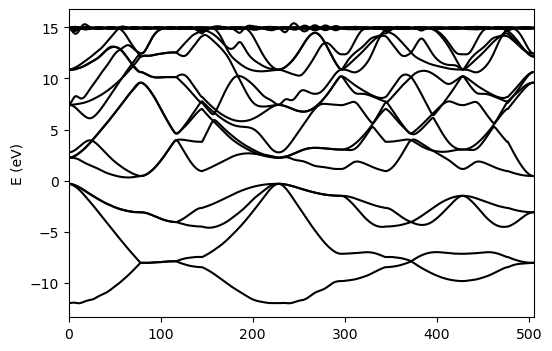

In [7]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0],color='black')
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Si_VASP.png',bbox_inches='tight')  

# Example 01: Si (nspin = 2)

In [8]:
paoflow = PAOFLOW(savedir='./example01/nscf_nspin2/',  
                  outputdir='./example01/output_nspin2/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Fd-3m (227)
Insulator: True
Magnetic: False
Number of kpoints: 72
Number of e

In [9]:
basis_path = '../../BASIS/'
basis_config = {'Si':['3S','3P','3D','4S','4P','4D']}
paoflow.projections(basispath=basis_path, configuration=basis_config)  # "internal=True" is optional, always use internal basis when dft == 'VASP'

atom: Si  AEWFC: ../../BASIS/Si\3S.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\3P.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\3D.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\4S.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\4P.dat           tau: [0. 0. 0.]
atom: Si  AEWFC: ../../BASIS/Si\4D.dat           tau: [0. 0. 0.]
      atwfc:   1  3S  l=0, m=1
      atwfc:   2  3P  l=1, m=1
      atwfc:   3  3P  l=1, m=2
      atwfc:   4  3P  l=1, m=3
      atwfc:   5  3D  l=2, m=1
      atwfc:   6  3D  l=2, m=2
      atwfc:   7  3D  l=2, m=3
      atwfc:   8  3D  l=2, m=4
      atwfc:   9  3D  l=2, m=5
      atwfc:  10  4S  l=0, m=1
      atwfc:  11  4P  l=1, m=1
      atwfc:  12  4P  l=1, m=2
      atwfc:  13  4P  l=1, m=3
      atwfc:  14  4D  l=2, m=1
      atwfc:  15  4D  l=2, m=2
      atwfc:  16  4D  l=2, m=3
      atwfc:  17  4D  l=2, m=4
      atwfc:  18  4D  l=2, m=5
atom: Si  AEWFC: ../../BASIS/Si\3S.dat           tau

In [10]:
paoflow.projectability()

Projectability vector  [0.99310902 0.99065834 0.98813563 0.98539483 0.98769811 0.98595877
 0.9825043  0.98180015 0.98463903 0.98420944 0.96864314 0.970127
 0.96672217 0.96248311 0.91663678 0.94022273 0.92655815 0.84904813]
# of bands with good projectability > 0.95 = 14
Range of suggested shift  14.937893840000001  ,  18.828793840000003
Projectability in:                          0.027 sec


In [11]:
paoflow.pao_hamiltonian()

Building Hks in:                            2.151 sec
k -> R in:                                  0.240 sec


In [12]:
paoflow.bands(ibrav=2,nk=500)

Bands in:                                   1.116 sec


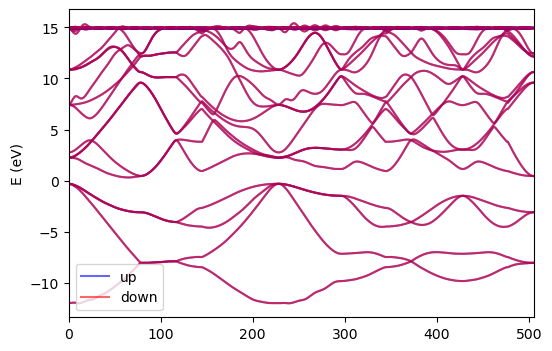

In [13]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0,0],color='blue',alpha=0.6,label="up")
plt.plot(eband[:,0,1],color='red',alpha=0.6,label="down")
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib,0],color='blue',alpha=0.6)
    plt.plot(eband[:,ib,1],color='red',alpha=0.6)
plt.legend()
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Si_VASP_nspin2.png',bbox_inches='tight')  

# Example02: Pt (with SOC)

In [14]:
outdir = './example02/output/'
paoflow = PAOFLOW(savedir='./example02/nscf/',
                  outputdir=outdir, 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Fm-3m (225)
Insulator: False
Magnetic: False
Number of kpoints: 72
Number of 

In [15]:
basis_path = '../../BASIS/'
basis_config = {'Pt':['5D','6S','6P','7S','7P']}
paoflow.projections(basispath=basis_path, configuration=basis_config)  # "internal=True" is optional, always use internal basis when dft == 'VASP'

atom: Pt  AEWFC: ../../BASIS/Pt\5D.dat           tau: [0. 0. 0.]
atom: Pt  AEWFC: ../../BASIS/Pt\6S.dat           tau: [0. 0. 0.]
atom: Pt  AEWFC: ../../BASIS/Pt\6P.dat           tau: [0. 0. 0.]
atom: Pt  AEWFC: ../../BASIS/Pt\7S.dat           tau: [0. 0. 0.]
atom: Pt  AEWFC: ../../BASIS/Pt\7P.dat           tau: [0. 0. 0.]
      atwfc:   1  5D  l=2, m=1
      atwfc:   2  5D  l=2, m=2
      atwfc:   3  5D  l=2, m=3
      atwfc:   4  5D  l=2, m=4
      atwfc:   5  5D  l=2, m=5
      atwfc:   6  5D  l=2, m=1
      atwfc:   7  5D  l=2, m=2
      atwfc:   8  5D  l=2, m=3
      atwfc:   9  5D  l=2, m=4
      atwfc:  10  5D  l=2, m=5
      atwfc:  11  6S  l=0, m=1
      atwfc:  12  6S  l=0, m=1
      atwfc:  13  6P  l=1, m=1
      atwfc:  14  6P  l=1, m=2
      atwfc:  15  6P  l=1, m=3
      atwfc:  16  6P  l=1, m=1
      atwfc:  17  6P  l=1, m=2
      atwfc:  18  6P  l=1, m=3
      atwfc:  19  7S  l=0, m=1
      atwfc:  20  7S  l=0, m=1
      atwfc:  21  7P  l=1, m=1
      atwfc:  22  7P  l=

In [16]:
paoflow.projectability()

Projectability vector  [0.98418964 0.98418828 0.96593671 0.96592066 0.96660345 0.96660519
 0.95650462 0.9565008  0.9524204  0.95241346 0.95863714 0.95863476
 0.85200682 0.85199256 0.66126058 0.6612731  0.71565118 0.71570637
 0.43368345 0.43278206]
# of bands with good projectability > 0.95 = 12
Range of suggested shift  5.49489934  ,  16.76739934
Projectability in:                          0.031 sec


In [17]:
paoflow.pao_hamiltonian(expand_wedge=True)

Building Hks in:                            1.092 sec
k -> R in:                                  0.065 sec


In [18]:
paoflow.bands(ibrav=2,nk=500)

Bands in:                                   0.530 sec


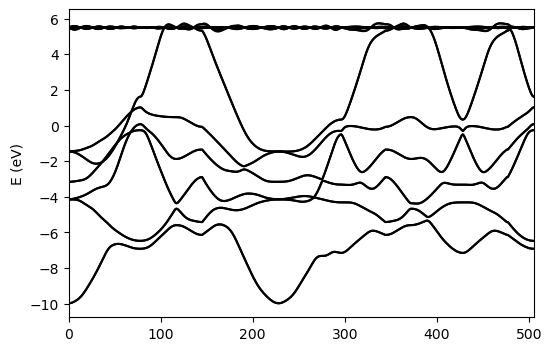

In [19]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()

In [20]:
paoflow.interpolated_hamiltonian()
paoflow.pao_eigh()
paoflow.gradient_and_momenta()
paoflow.adaptive_smearing(smearing='m-p')

Performing Fourier interpolation on a larger grid.
d : nk -> nfft
1 : 12 -> 24
2 : 12 -> 24
3 : 12 -> 24
New estimated maximum array size: 1.79 GBytes
R -> k with Zero Padding in:                0.934 sec
Eigenvalues in:                            10.271 sec
Gradient in:                                2.870 sec
Momenta in:                                 9.917 sec
Adaptive Smearing in:                       1.248 sec


In [21]:
paoflow.spin_Hall(emin=-8., emax=4., s_tensor=[[0,1,2]])

Writing bxsf files for Spin Berry Curvature
Spin Hall Conductivity in:                 16.125 sec


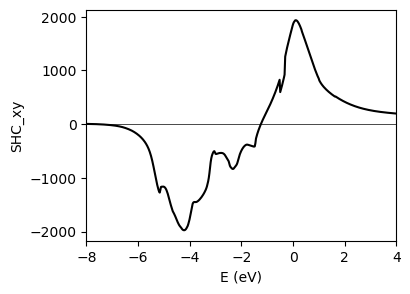

In [22]:
shc = np.loadtxt(outdir+'shcEf_z_xy.dat') 
fig = plt.figure(figsize=(4,3))
plt.plot(shc[:,0],shc[:,1],color='black')
plt.xlabel("E (eV)")
plt.ylabel("SHC_xy")
plt.xlim([-8,4])
plt.axhline(0,color='k',linewidth=0.5)
plt.show()

# Example03: Fe (with SOC, FM)

In [23]:
outdir = './example03/output/'
paoflow = PAOFLOW(savedir='./example03/nscf/',
                  outputdir=outdir, 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Im-3m (229)
Insulator: False
Magnetic: True
Number of kpoints: 242
Number of 

In [24]:
basis_path = '../../BASIS/'
basis_config = {'Fe':['3D','4S','4P','4D','5S','5P']}
paoflow.projections(basispath=basis_path, configuration=basis_config)

atom: Fe  AEWFC: ../../BASIS/Fe\3D.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\4S.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\4P.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\4D.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\5S.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\5P.dat           tau: [0. 0. 0.]
      atwfc:   1  3D  l=2, m=1
      atwfc:   2  3D  l=2, m=2
      atwfc:   3  3D  l=2, m=3
      atwfc:   4  3D  l=2, m=4
      atwfc:   5  3D  l=2, m=5
      atwfc:   6  3D  l=2, m=1
      atwfc:   7  3D  l=2, m=2
      atwfc:   8  3D  l=2, m=3
      atwfc:   9  3D  l=2, m=4
      atwfc:  10  3D  l=2, m=5
      atwfc:  11  4S  l=0, m=1
      atwfc:  12  4S  l=0, m=1
      atwfc:  13  4P  l=1, m=1
      atwfc:  14  4P  l=1, m=2
      atwfc:  15  4P  l=1, m=3
      atwfc:  16  4P  l=1, m=1
      atwfc:  17  4P  l=1, m=2
      atwfc:  18  4P  l=1, m=3
      atwfc:  19  4D  l=2, m=1
      atwfc:  20  4D 

In [25]:
paoflow.projectability(pthr=0.90)

Projectability vector  [0.9288716  0.92914785 0.91476342 0.91681965 0.90542112 0.90109328
 0.90971065 0.91046696 0.89244272 0.90559374 0.91714585 0.89113578
 0.90838498 0.89608389 0.88356118 0.87224313 0.85553157 0.85226032
 0.44201382 0.43591139]
# of bands with good projectability > 0.9 = 11
Range of suggested shift  1.5359874600000003  ,  9.851387460000002
Projectability in:                          0.019 sec


In [26]:
paoflow.pao_hamiltonian()

Building Hks in:                            0.867 sec
k -> R in:                                  0.122 sec


In [27]:
paoflow.bands(ibrav=3,nk=500)

Bands in:                                   0.547 sec


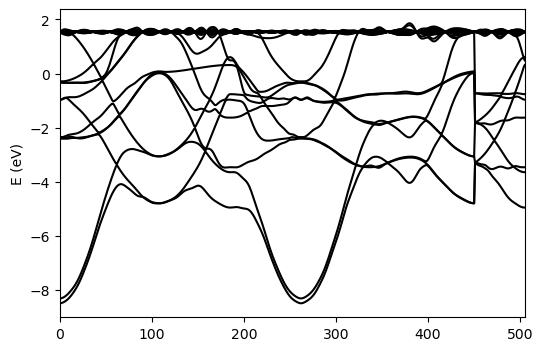

In [28]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0],color='black')
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Fe_VASP.png',bbox_inches='tight')

In [29]:
paoflow.interpolated_hamiltonian()
paoflow.pao_eigh()
paoflow.gradient_and_momenta()
paoflow.adaptive_smearing(smearing='m-p')

Performing Fourier interpolation on a larger grid.
d : nk -> nfft
1 : 12 -> 24
2 : 12 -> 24
3 : 12 -> 24
New estimated maximum array size: 3.44 GBytes
R -> k with Zero Padding in:                1.571 sec
Eigenvalues in:                             5.421 sec
Gradient in:                                6.026 sec
Momenta in:                                30.291 sec
Adaptive Smearing in:                       2.160 sec


In [30]:
paoflow.anomalous_Hall(do_ac=True, emin=-6., emax=1., a_tensor=np.array([[0,1]]))

Writing bxsf files for Berry Curvature
Anomalous Hall Conductivity in:           487.223 sec


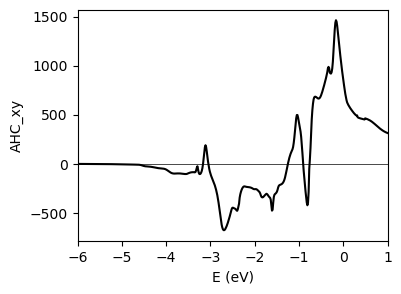

In [31]:
ahc = np.loadtxt(outdir+'ahcEf_xy.dat')
fig = plt.figure(figsize=(4,3))
plt.xlabel("E (eV)")
plt.ylabel("AHC_xy")
plt.plot(ahc[:,0],ahc[:,1],color='black')
plt.xlim([-6,1])
plt.axhline(0,color='k',linewidth=0.5)
plt.show()

# Example04: MnF2 (nspin=2, collinear AFM)

In [32]:
paoflow = PAOFLOW(savedir='./example04/nscf/',
                  outputdir='./example04/output/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 8 8 12 0 0 0
Space group: P4_2/mnm (136)
Insulator: True
Magnetic: True
Number of kpoints: 105
Number of 

In [33]:
basis_path = '../../BASIS/'
basis_config = {'Mn':['3P','3D','4S','4P','4D','4F'],
                'F':['2P','3S','3P','3D','4S']}
paoflow.projections(basispath=basis_path, configuration=basis_config) 

atom: Mn  AEWFC: ../../BASIS/Mn\3P.dat           tau: [0. 0. 0.]
atom: Mn  AEWFC: ../../BASIS/Mn\3D.dat           tau: [0. 0. 0.]
atom: Mn  AEWFC: ../../BASIS/Mn\4S.dat           tau: [0. 0. 0.]
atom: Mn  AEWFC: ../../BASIS/Mn\4P.dat           tau: [0. 0. 0.]
atom: Mn  AEWFC: ../../BASIS/Mn\4D.dat           tau: [0. 0. 0.]
atom: Mn  AEWFC: ../../BASIS/Mn\4F.dat           tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  3D  l=2, m=1
      atwfc:   5  3D  l=2, m=2
      atwfc:   6  3D  l=2, m=3
      atwfc:   7  3D  l=2, m=4
      atwfc:   8  3D  l=2, m=5
      atwfc:   9  4S  l=0, m=1
      atwfc:  10  4P  l=1, m=1
      atwfc:  11  4P  l=1, m=2
      atwfc:  12  4P  l=1, m=3
      atwfc:  13  4D  l=2, m=1
      atwfc:  14  4D  l=2, m=2
      atwfc:  15  4D  l=2, m=3
      atwfc:  16  4D  l=2, m=4
      atwfc:  17  4D  l=2, m=5
      atwfc:  18  4F  l=3, m=1
      atwfc:  19  4F  l=3, m=2
      atwfc:  20  4F 

In [34]:
paoflow.projectability(pthr=0.90)

Projectability vector  [0.96253166 0.96427115 0.96451708 0.96464321 0.95682998 0.95627354
 0.94922616 0.95122929 0.95096439 0.95578937 0.95714422 0.95895593
 0.95292168 0.95783611 0.95822169 0.95670986 0.87776659 0.88338878
 0.88122898 0.86735517 0.87691689 0.93081204 0.90998563 0.90533025
 0.90163643 0.88835973 0.91975827 0.96576968 0.97705995 0.97674761
 0.9754993  0.97587228 0.97692308 0.97794291 0.97588859 0.97459249]
# of bands with good projectability > 0.9 = 30
Range of suggested shift  10.672977399999999  ,  14.344577399999999
Projectability in:                          0.038 sec


In [35]:
paoflow.pao_hamiltonian()

Building Hks in:                            3.763 sec
k -> R in:                                  0.925 sec


In [36]:
paoflow.bands(ibrav=6,nk=500)

Bands in:                                  13.716 sec


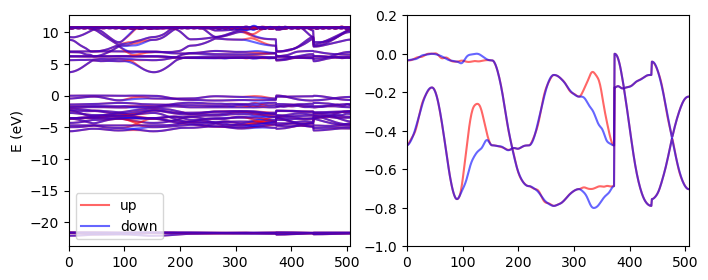

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
# plot the paoflow bands (all bands and bands near Fermi energy)
eband = arry['E_k']
ax[0].plot(eband[:,0,0],color='red',alpha=0.6,label="up")
ax[0].plot(eband[:,0,1],color='blue',alpha=0.6,label="down")
for ib in range(1,eband.shape[1]):
    ax[0].plot(eband[:,ib,0],color='red',alpha=0.6)
    ax[0].plot(eband[:,ib,1],color='blue',alpha=0.6)
    ax[1].plot(eband[:,ib,0],color='red',alpha=0.6)
    ax[1].plot(eband[:,ib,1],color='blue',alpha=0.6)
ax[1].set_ylim([-1,0.2])
ax[0].set_xlim([0,eband.shape[0]-1])
ax[1].set_xlim([0,eband.shape[0]-1])
ax[0].set_ylabel("E (eV)")
ax[0].legend()
plt.show()
# plt.savefig('MnF2_VASP.png',bbox_inches='tight')

# Example05: Mn3Ir (with SOC, noncollinear 120$^\circ$ AFM)

In [38]:
paoflow = PAOFLOW(savedir='./example05/nscf/',
                  outputdir='./example05/output/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 10 10 10 0 0 0
Space group: Pm-3m (221)
Insulator: False
Magnetic: True
Number of kpoints: 172
Number of 

In [39]:
basis_path = '../../BASIS/'
basis_config = {'Ir':['5P','5D','6S','6P','7S'],
                'Mn':['3P','3D','4S','4P','4D']}
paoflow.projections(basispath=basis_path, configuration=basis_config) 

atom: Ir  AEWFC: ../../BASIS/Ir\5P.dat           tau: [0. 0. 0.]
atom: Ir  AEWFC: ../../BASIS/Ir\5D.dat           tau: [0. 0. 0.]
atom: Ir  AEWFC: ../../BASIS/Ir\6S.dat           tau: [0. 0. 0.]
atom: Ir  AEWFC: ../../BASIS/Ir\6P.dat           tau: [0. 0. 0.]
atom: Ir  AEWFC: ../../BASIS/Ir\7S.dat           tau: [0. 0. 0.]
      atwfc:   1  5P  l=1, m=1
      atwfc:   2  5P  l=1, m=2
      atwfc:   3  5P  l=1, m=3
      atwfc:   4  5P  l=1, m=1
      atwfc:   5  5P  l=1, m=2
      atwfc:   6  5P  l=1, m=3
      atwfc:   7  5D  l=2, m=1
      atwfc:   8  5D  l=2, m=2
      atwfc:   9  5D  l=2, m=3
      atwfc:  10  5D  l=2, m=4
      atwfc:  11  5D  l=2, m=5
      atwfc:  12  5D  l=2, m=1
      atwfc:  13  5D  l=2, m=2
      atwfc:  14  5D  l=2, m=3
      atwfc:  15  5D  l=2, m=4
      atwfc:  16  5D  l=2, m=5
      atwfc:  17  6S  l=0, m=1
      atwfc:  18  6S  l=0, m=1
      atwfc:  19  6P  l=1, m=1
      atwfc:  20  6P  l=1, m=2
      atwfc:  21  6P  l=1, m=3
      atwfc:  22  6P  l=

In [40]:
paoflow.projectability(pthr=0.90)

Projectability vector  [0.98972321 0.99002268 0.96977821 0.97303032 0.96688848 0.97090448
 0.96366766 0.96860099 0.96360712 0.96306746 0.96006424 0.95661519
 0.95616507 0.95211964 0.94350014 0.93998837 0.93672238 0.93483027
 0.93393717 0.91959913 0.92220855 0.91480924 0.91701221 0.9180249
 0.92349146 0.9255495  0.9253709  0.93570626 0.94056335 0.94049338
 0.93148843 0.9271042  0.92476301 0.91049252 0.90692693 0.90783239
 0.90973202 0.90751186 0.90805019 0.90523427]
# of bands with good projectability > 0.9 = 40
Projectability in:                          0.045 sec


In [41]:
paoflow.pao_hamiltonian()

Building Hks in:                            2.826 sec
k -> R in:                                  1.027 sec


In [42]:
paoflow.bands(ibrav=1,nk=500)

Bands in:                                  14.056 sec


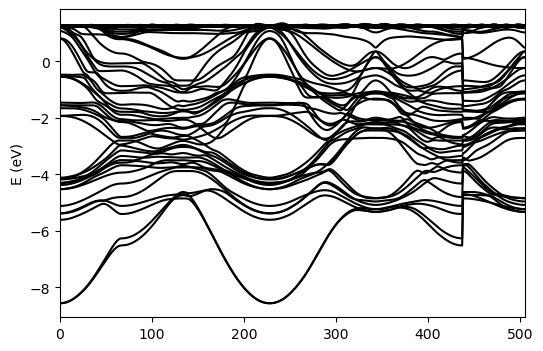

In [43]:
fig = plt.figure(figsize=(6,4))
# plot the paoflow bands
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Mn3Ir_VASP.png',bbox_inches='tight')

# Example06: FeRh (with SOC, FM)

In [44]:
paoflow = PAOFLOW(savedir='./example06/nscf_soc/',
                  outputdir='./example06/output_soc/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Pm-3m (221)
Insulator: False
Magnetic: True
Number of kpoints: 266
Number of 

In [45]:
basis_path = '../../BASIS/'
basis_config = {'Fe':['3D','4S','4P','4D','5S','5P'],
                'Rh':['4D','4F','5S','5P','5D']}
paoflow.projections(basispath=basis_path, configuration=basis_config)

atom: Fe  AEWFC: ../../BASIS/Fe\3D.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\4S.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\4P.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\4D.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\5S.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\5P.dat           tau: [0. 0. 0.]
      atwfc:   1  3D  l=2, m=1
      atwfc:   2  3D  l=2, m=2
      atwfc:   3  3D  l=2, m=3
      atwfc:   4  3D  l=2, m=4
      atwfc:   5  3D  l=2, m=5
      atwfc:   6  3D  l=2, m=1
      atwfc:   7  3D  l=2, m=2
      atwfc:   8  3D  l=2, m=3
      atwfc:   9  3D  l=2, m=4
      atwfc:  10  3D  l=2, m=5
      atwfc:  11  4S  l=0, m=1
      atwfc:  12  4S  l=0, m=1
      atwfc:  13  4P  l=1, m=1
      atwfc:  14  4P  l=1, m=2
      atwfc:  15  4P  l=1, m=3
      atwfc:  16  4P  l=1, m=1
      atwfc:  17  4P  l=1, m=2
      atwfc:  18  4P  l=1, m=3
      atwfc:  19  4D  l=2, m=1
      atwfc:  20  4D 

In [46]:
paoflow.projectability(pthr=0.90)

Projectability vector  [0.96942104 0.95012422 0.94721949 0.93614589 0.92500425 0.93308848
 0.92539861 0.93194486 0.92560881 0.919522   0.92342568 0.92018536
 0.91953167 0.9290087  0.93485859 0.93038732 0.91656053 0.9005916
 0.89937441 0.92787386 0.92883853 0.91829894 0.94838986 0.93695376
 0.96700363 0.96297985 0.96496881 0.96240984 0.95714788 0.93836192
 0.91746191 0.91972833]
# of bands with good projectability > 0.9 = 31
Range of suggested shift  9.860800900000001  ,  17.2602009
Projectability in:                          0.050 sec


In [47]:
paoflow.pao_hamiltonian()

Building Hks in:                            2.508 sec
k -> R in:                                  0.522 sec


In [48]:
paoflow.bands(ibrav=1,nk=500)

Bands in:                                   3.979 sec


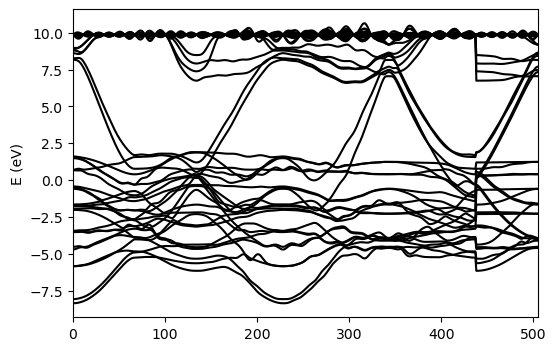

In [49]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('FeRh_VASP.png',bbox_inches='tight')  

 # Example06: FeRh (nspin = 2, FM)

In [50]:
paoflow = PAOFLOW(savedir='./example06/nscf_nspin2/',
                  outputdir='./example06/output_nspin2/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Pm-3m (221)
Insulator: False
Magnetic: True
Number of kpoints: 84
Number of e

In [51]:
basis_path = '../../BASIS/'
basis_config = {'Fe':['3D','4S','4P','4D','5S','5P'],
                'Rh':['4D','4F','5S','5P','5D']}
paoflow.projections(basispath=basis_path, configuration=basis_config)

atom: Fe  AEWFC: ../../BASIS/Fe\3D.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\4S.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\4P.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\4D.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\5S.dat           tau: [0. 0. 0.]
atom: Fe  AEWFC: ../../BASIS/Fe\5P.dat           tau: [0. 0. 0.]
      atwfc:   1  3D  l=2, m=1
      atwfc:   2  3D  l=2, m=2
      atwfc:   3  3D  l=2, m=3
      atwfc:   4  3D  l=2, m=4
      atwfc:   5  3D  l=2, m=5
      atwfc:   6  4S  l=0, m=1
      atwfc:   7  4P  l=1, m=1
      atwfc:   8  4P  l=1, m=2
      atwfc:   9  4P  l=1, m=3
      atwfc:  10  4D  l=2, m=1
      atwfc:  11  4D  l=2, m=2
      atwfc:  12  4D  l=2, m=3
      atwfc:  13  4D  l=2, m=4
      atwfc:  14  4D  l=2, m=5
      atwfc:  15  5S  l=0, m=1
      atwfc:  16  5P  l=1, m=1
      atwfc:  17  5P  l=1, m=2
      atwfc:  18  5P  l=1, m=3
atom: Rh  AEWFC: ../../BASIS/Rh\4D.dat           tau

In [52]:
paoflow.projectability(pthr=0.90)

Projectability vector  [0.97354572 0.93727849 0.94139393 0.91955077 0.92816319 0.92584235
 0.90100264 0.90976305 0.92603481 0.92963779 0.92372953 0.94915393
 0.96332228 0.96645518 0.95149576 0.91308933]
# of bands with good projectability > 0.9 = 16
Projectability in:                          0.035 sec


In [53]:
paoflow.pao_hamiltonian()

Building Hks in:                            2.946 sec
k -> R in:                                  0.337 sec


In [54]:
paoflow.bands(ibrav=1,nk=500)

Bands in:                                   1.867 sec


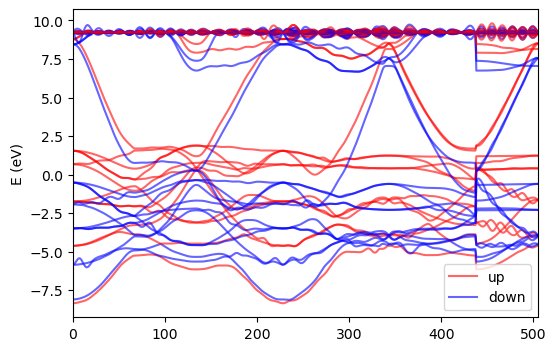

In [55]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0,0],color='red',alpha=0.6,label="up")
plt.plot(eband[:,0,1],color='blue',alpha=0.6,label="down")
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib,0],color='blue',alpha=0.6)
    plt.plot(eband[:,ib,1],color='red',alpha=0.6)
plt.legend()
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('FeRh_nspin2_VASP.png',bbox_inches='tight')  

# Example 07: CrI3 monolayer (nspin = 2, FM)

In [56]:
paoflow = PAOFLOW(savedir='./example07/nscf_nspin2/',  
                  outputdir='./example07/output_nspin2/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 10 10 1 0 0 0
Space group: P-31m (162)
Insulator: True
Magnetic: True
Number of kpoints: 14
Number of ele

In [57]:
basis_path = '../../BASIS/'
basis_config = {'Cr':['3D','4S','4P','4D','5S','5P','5D'],
                'I':['5S','5P','5D','6S','6P','4F']}
paoflow.projections(basispath=basis_path, configuration=basis_config) 

atom: Cr  AEWFC: ../../BASIS/Cr\3D.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\4S.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\4P.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\4D.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\5S.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\5P.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\5D.dat           tau: [ 6.62154732  3.82295205 17.06756766]
      atwfc:   1  3D  l=2, m=1
      atwfc:   2  3D  l=2, m=2
      atwfc:   3  3D  l=2, m=3
      atwfc:   4  3D  l=2, m=4
      atwfc:   5  3D  l=2, m=5
      atwfc:   6  4S  l=0, m=1
      atwfc:   7  4P  l=1, m=1
      atwfc:   8  4P  l=1, m=2
      atwfc:   9  4P  l=1, m=3
      atwfc:  10  4D  l=2, m=1
      atwfc:  11  4D  l=2, m=2
      atwfc:  1

      atwfc: 136  6S  l=0, m=1
      atwfc: 137  6P  l=1, m=1
      atwfc: 138  6P  l=1, m=2
      atwfc: 139  6P  l=1, m=3
      atwfc: 140  4F  l=3, m=1
      atwfc: 141  4F  l=3, m=2
      atwfc: 142  4F  l=3, m=3
      atwfc: 143  4F  l=3, m=4
      atwfc: 144  4F  l=3, m=5
      atwfc: 145  4F  l=3, m=6
      atwfc: 146  4F  l=3, m=7
atom: I   AEWFC: ../../BASIS/I\5S.dat            tau: [-2.35404175  4.07736832 20.08480225]
atom: I   AEWFC: ../../BASIS/I\5P.dat            tau: [-2.35404175  4.07736832 20.08480225]
atom: I   AEWFC: ../../BASIS/I\5D.dat            tau: [-2.35404175  4.07736832 20.08480225]
atom: I   AEWFC: ../../BASIS/I\6S.dat            tau: [-2.35404175  4.07736832 20.08480225]
atom: I   AEWFC: ../../BASIS/I\6P.dat            tau: [-2.35404175  4.07736832 20.08480225]
atom: I   AEWFC: ../../BASIS/I\4F.dat            tau: [-2.35404175  4.07736832 20.08480225]
      atwfc: 147  5S  l=0, m=1
      atwfc: 148  5P  l=1, m=1
      atwfc: 149  5P  l=1, m=2
      atwfc: 1

In [58]:
paoflow.projectability(pthr=0.85)

Projectability vector  [0.9362446  0.94083762 0.94916773 0.95320445 0.96117883 0.96355637
 0.93074292 0.91840215 0.91646944 0.91902882 0.91783703 0.91911695
 0.92547213 0.92070886 0.92635981 0.91338594 0.91527874 0.9040283
 0.89291088 0.8956047  0.89496743 0.88854566 0.89171104 0.89446587
 0.90104399 0.90003063 0.89479542 0.89331987 0.88944125 0.90002788
 0.84519963 0.85459496 0.85023931 0.84611917 0.8723867  0.8630488
 0.78300308 0.82431556 0.79376075 0.82098489]
# of bands with good projectability > 0.85 = 34
Range of suggested shift  4.42565194  ,  5.276651940000001
Projectability in:                          0.037 sec


In [59]:
paoflow.pao_hamiltonian()

Building Hks in:                            1.565 sec
k -> R in:                                  0.493 sec


In [60]:
path = 'G-M-K-G'
sym_points = {'G':[0.0, 0.0, 0.0],
            'M':[0.5, 0.0, 0.0],
            'K':[1/3, 1/3, 0.0]}
paoflow.bands(ibrav=0, nk=500, band_path = path, high_sym_points = sym_points)

Bands in:                                  36.355 sec


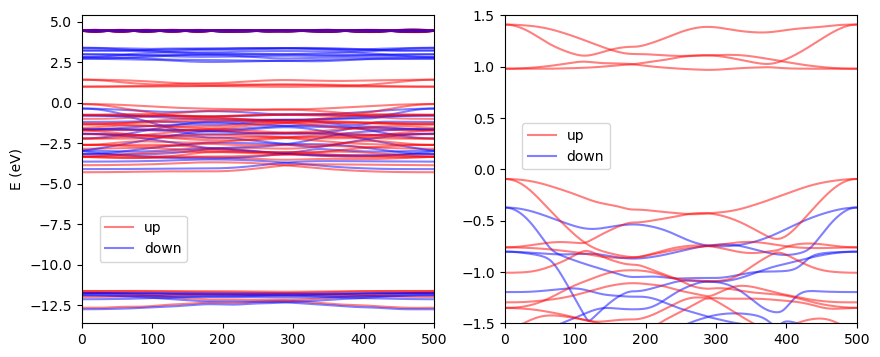

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
eband = arry['E_k']
ax[0].plot(eband[:,0,0],color='red',alpha=0.5,label="up")
ax[0].plot(eband[:,0,1],color='blue',alpha=0.5,label="down")
ax[1].plot(eband[:,0,0],color='red',alpha=0.5,label="up")
ax[1].plot(eband[:,0,1],color='blue',alpha=0.5,label="down")
for ib in range(1,eband.shape[1]):
    ax[0].plot(eband[:,ib,0],color='red',alpha=0.5)
    ax[0].plot(eband[:,ib,1],color='blue',alpha=0.5)
    ax[1].plot(eband[:,ib,0],color='red',alpha=0.5)
    ax[1].plot(eband[:,ib,1],color='blue',alpha=0.5)
    
ax[0].legend(loc=[0.05,0.2])
ax[1].legend(loc=[0.05,0.5])
ax[0].set_xlim([0,eband.shape[0]-1])
ax[1].set_xlim([0,eband.shape[0]-1])
ax[1].set_ylim([-1.5,1.5])
ax[0].set_ylabel("E (eV)")
plt.show()

# Example 07: CrI3 monolayer (with SOC, FM)

In [62]:
paoflow_soc = PAOFLOW(savedir='./example07/nscf_soc/',  
                  outputdir='./example07/output_soc/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow_soc.data_controller
arry_soc,attr_soc = paoflow_soc.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 10 10 1 0 0 0
Space group: P-31m (162)
Insulator: True
Magnetic: True
Number of kpoints: 18
Number of ele

In [63]:
basis_path = '../../BASIS/'
basis_config = {'Cr':['3D','4S','4P','4D','5S','5P','5D'],
                'I':['5S','5P','5D','6S','6P','4F']}
paoflow_soc.projections(basispath=basis_path, configuration=basis_config) 

atom: Cr  AEWFC: ../../BASIS/Cr\3D.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\4S.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\4P.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\4D.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\5S.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\5P.dat           tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ../../BASIS/Cr\5D.dat           tau: [ 6.62154732  3.82295205 17.06756766]
      atwfc:   1  3D  l=2, m=1
      atwfc:   2  3D  l=2, m=2
      atwfc:   3  3D  l=2, m=3
      atwfc:   4  3D  l=2, m=4
      atwfc:   5  3D  l=2, m=5
      atwfc:   6  3D  l=2, m=1
      atwfc:   7  3D  l=2, m=2
      atwfc:   8  3D  l=2, m=3
      atwfc:   9  3D  l=2, m=4
      atwfc:  10  3D  l=2, m=5
      atwfc:  11  4S  l=0, m=1
      atwfc:  1

      atwfc: 173  5S  l=0, m=1
      atwfc: 174  5S  l=0, m=1
      atwfc: 175  5P  l=1, m=1
      atwfc: 176  5P  l=1, m=2
      atwfc: 177  5P  l=1, m=3
      atwfc: 178  5P  l=1, m=1
      atwfc: 179  5P  l=1, m=2
      atwfc: 180  5P  l=1, m=3
      atwfc: 181  5D  l=2, m=1
      atwfc: 182  5D  l=2, m=2
      atwfc: 183  5D  l=2, m=3
      atwfc: 184  5D  l=2, m=4
      atwfc: 185  5D  l=2, m=5
      atwfc: 186  5D  l=2, m=1
      atwfc: 187  5D  l=2, m=2
      atwfc: 188  5D  l=2, m=3
      atwfc: 189  5D  l=2, m=4
      atwfc: 190  5D  l=2, m=5
      atwfc: 191  6S  l=0, m=1
      atwfc: 192  6S  l=0, m=1
      atwfc: 193  6P  l=1, m=1
      atwfc: 194  6P  l=1, m=2
      atwfc: 195  6P  l=1, m=3
      atwfc: 196  6P  l=1, m=1
      atwfc: 197  6P  l=1, m=2
      atwfc: 198  6P  l=1, m=3
      atwfc: 199  4F  l=3, m=1
      atwfc: 200  4F  l=3, m=2
      atwfc: 201  4F  l=3, m=3
      atwfc: 202  4F  l=3, m=4
      atwfc: 203  4F  l=3, m=5
      atwfc: 204  4F  l=3, m=6
      at

In [64]:
paoflow_soc.projectability(pthr=0.85)

Projectability vector  [0.93721596 0.93766069 0.94214036 0.94335755 0.94963527 0.95100183
 0.95093558 0.95675729 0.95535483 0.96283537 0.96047264 0.9628381
 0.93146059 0.92193814 0.91870885 0.9094278  0.91434744 0.90797141
 0.91012109 0.91024122 0.91071179 0.91238524 0.92062354 0.91842742
 0.92069083 0.92152968 0.92221033 0.91605633 0.91804282 0.91312253
 0.91196278 0.9064835  0.90420678 0.89902507 0.90792655 0.90243768
 0.90057773 0.89836203 0.89797135 0.89239757 0.89402205 0.89787031
 0.89409962 0.89070486 0.8880311  0.89132725 0.89414244 0.89041264
 0.88986188 0.89580108 0.89648901 0.90028714 0.9077727  0.90727945
 0.82784971 0.83790312 0.83923743 0.84290216 0.92181014 0.92068479
 0.90831557 0.90253356 0.88656363 0.89583035 0.86472087 0.87487658
 0.86143071 0.85561591 0.92148883 0.87411978 0.82991604 0.86130923
 0.78570975 0.7955482  0.77298453 0.84821935 0.82451095 0.78276624
 0.83272059 0.80571242]
# of bands with good projectability > 0.85 = 67
Range of suggested shift  2.9321202

In [65]:
paoflow_soc.pao_hamiltonian()

Building Hks in:                            3.352 sec
k -> R in:                                  0.671 sec


In [66]:
path = 'G-M-K-G'
sym_points = {'G':[0.0, 0.0, 0.0],
            'M':[0.5, 0.0, 0.0],
            'K':[1/3, 1/3, 0.0]}
paoflow_soc.bands(ibrav=0, nk=500, band_path = path, high_sym_points = sym_points)

Bands in:                                  56.860 sec


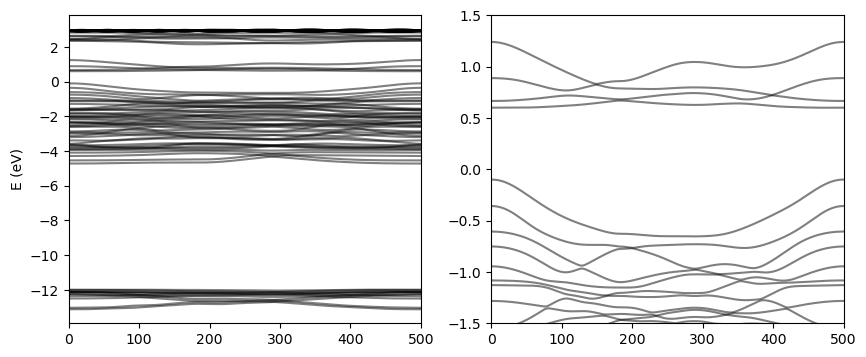

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
eband = arry_soc['E_k']
for ib in range(eband.shape[1]):
    ax[0].plot(eband[:,ib],color='k',alpha=0.5)
    ax[1].plot(eband[:,ib],color='k',alpha=0.5)
ax[0].set_xlim([0,eband.shape[0]-1])
ax[1].set_xlim([0,eband.shape[0]-1])
ax[1].set_ylim([-1.5,1.5])
ax[0].set_ylabel("E (eV)")
plt.show()